In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [12]:
#Load digits datasets
digits = load_digits()
X = digits.data
y = digits.target
k = 10  # Number of clusters

In [13]:
#Custom KMeans
def k_means(X, k, max_iters=100):
    # Initialize centroids randomly
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        # Assign clusters
        distances = pairwise_distances(X, centroids)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    # Compute total loss (sum of squared distances)
    loss = np.sum([np.linalg.norm(X[i] - centroids[labels[i]])**2 for i in range(len(X))])
    return labels, centroids, loss

In [14]:
#Custom KMedoids
def k_medoids(X, k, max_iters=100):
    np.random.seed(42)
    medoid_indices = np.random.choice(len(X), k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iters):
        distances = pairwise_distances(X, medoids)
        labels = np.argmin(distances, axis=1)

        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            medoid_index = np.argmin(pairwise_distances(cluster_points, cluster_points).sum(axis=1))
            new_medoids.append(cluster_points[medoid_index])
        
        new_medoids = np.array(new_medoids)
        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids

    # Compute total loss (sum of distances)
    loss = np.sum([np.linalg.norm(X[i] - medoids[labels[i]]) for i in range(len(X))])
    return labels, medoids, loss

Scratch K-Means Loss: 1171499.39
Scratch K-Medoids Loss: 55374.32
Sklearn K-Means Loss: 1187766.23
Sklearn K-Medoids Loss: 55982.72


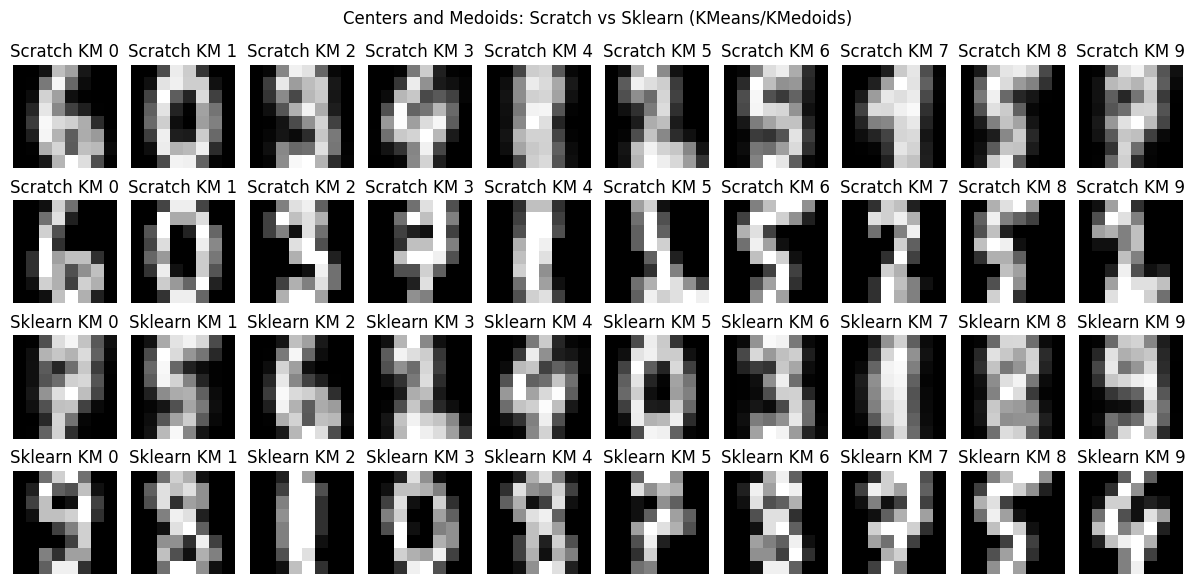

In [17]:
#Running both algorithms
labels_kmeans_scratch, centers_kmeans_scratch, loss_kmeans_scratch = k_means(X, k)
labels_kmedoids_scratch, medoids_kmedoids_scratch, loss_kmedoids_scratch = k_medoids(X, k)

print(f"Scratch K-Means Loss: {loss_kmeans_scratch:.2f}")
print(f"Scratch K-Medoids Loss: {loss_kmedoids_scratch:.2f}")

#Sklearn KMeans
kmeans_sklearn = KMeans(n_clusters=k, random_state=42)
kmeans_sklearn.fit(X)
labels_kmeans_sklearn = kmeans_sklearn.labels_
centers_kmeans_sklearn = kmeans_sklearn.cluster_centers_
loss_kmeans_sklearn = np.sum(np.min(np.linalg.norm(X[:, np.newaxis] - centers_kmeans_sklearn, axis=2)**2, axis=1))

#Sklearn KMedoids
kmedoids_sklearn = KMedoids(n_clusters=k, random_state=42, method='alternate')
kmedoids_sklearn.fit(X)
labels_kmedoids_sklearn = kmedoids_sklearn.labels_
medoids_kmedoids_sklearn = X[kmedoids_sklearn.medoid_indices_]
loss_kmedoids_sklearn = kmedoids_sklearn.inertia_

print(f"Sklearn K-Means Loss: {loss_kmeans_sklearn:.2f}")
print(f"Sklearn K-Medoids Loss: {loss_kmedoids_sklearn:.2f}")

#Visualizing Clusters
fig, axs = plt.subplots(4, k, figsize=(12, 6))

for i in range(k):
    axs[0, i].imshow(centers_kmeans_scratch[i].reshape(8, 8), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Scratch KM {i}")

    axs[1, i].imshow(medoids_kmedoids_scratch[i].reshape(8, 8), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Scratch KM {i}")

    axs[2, i].imshow(centers_kmeans_sklearn[i].reshape(8, 8), cmap='gray')
    axs[2, i].axis('off')
    axs[2, i].set_title(f"Sklearn KM {i}")

    axs[3, i].imshow(medoids_kmedoids_sklearn[i].reshape(8, 8), cmap='gray')
    axs[3, i].axis('off')
    axs[3, i].set_title(f"Sklearn KM {i}")

plt.suptitle("Centers and Medoids: Scratch vs Sklearn (KMeans/KMedoids)")
plt.tight_layout()
plt.show()

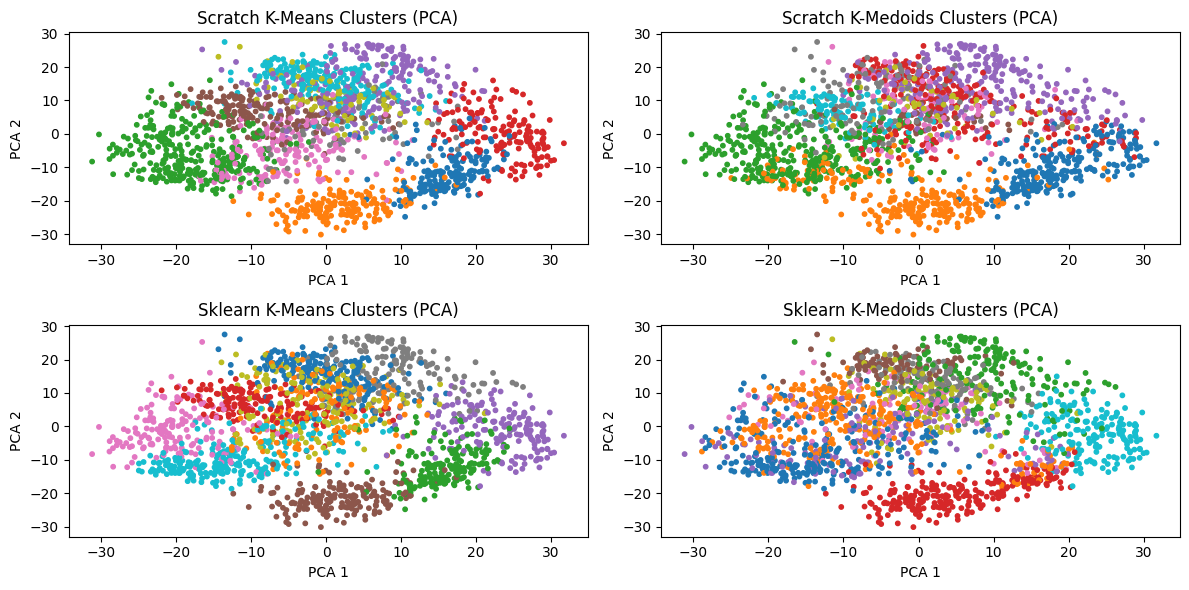

In [18]:
#PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))

#Custom K-Means
plt.subplot(2, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_scratch, cmap='tab10', s=10)
plt.title("Scratch K-Means Clusters (PCA)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#Custom K-Medoids
plt.subplot(2, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmedoids_scratch, cmap='tab10', s=10)
plt.title("Scratch K-Medoids Clusters (PCA)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#Sklearn K-Means
plt.subplot(2, 2, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_sklearn, cmap='tab10', s=10)
plt.title("Sklearn K-Means Clusters (PCA)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#Sklearn K-Medoids
plt.subplot(2, 2, 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmedoids_sklearn, cmap='tab10', s=10)
plt.title("Sklearn K-Medoids Clusters (PCA)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()
